In this notebook, we will explore key immune genes in zebrafish across different developmental stages. Later, we will examine how certain genes from the innate immune system respond to potential viral infections, stress, and inflammation.

Thanks to the Zebrahub team for providing detailed datasets that make this analysis possible and the authors of the paper "Modeling Infectious Diseases in the Context of a Developing Immune System" for explaining involved immune genes in zebrafish. 

Dataset: https://www.biorxiv.org/content/10.1101/2023.03.06.531398v2

Paper: https://pubmed.ncbi.nlm.nih.gov/28335862/




We will use figures in the paper to examine immune genes in our dataset and see if our findings align with them.

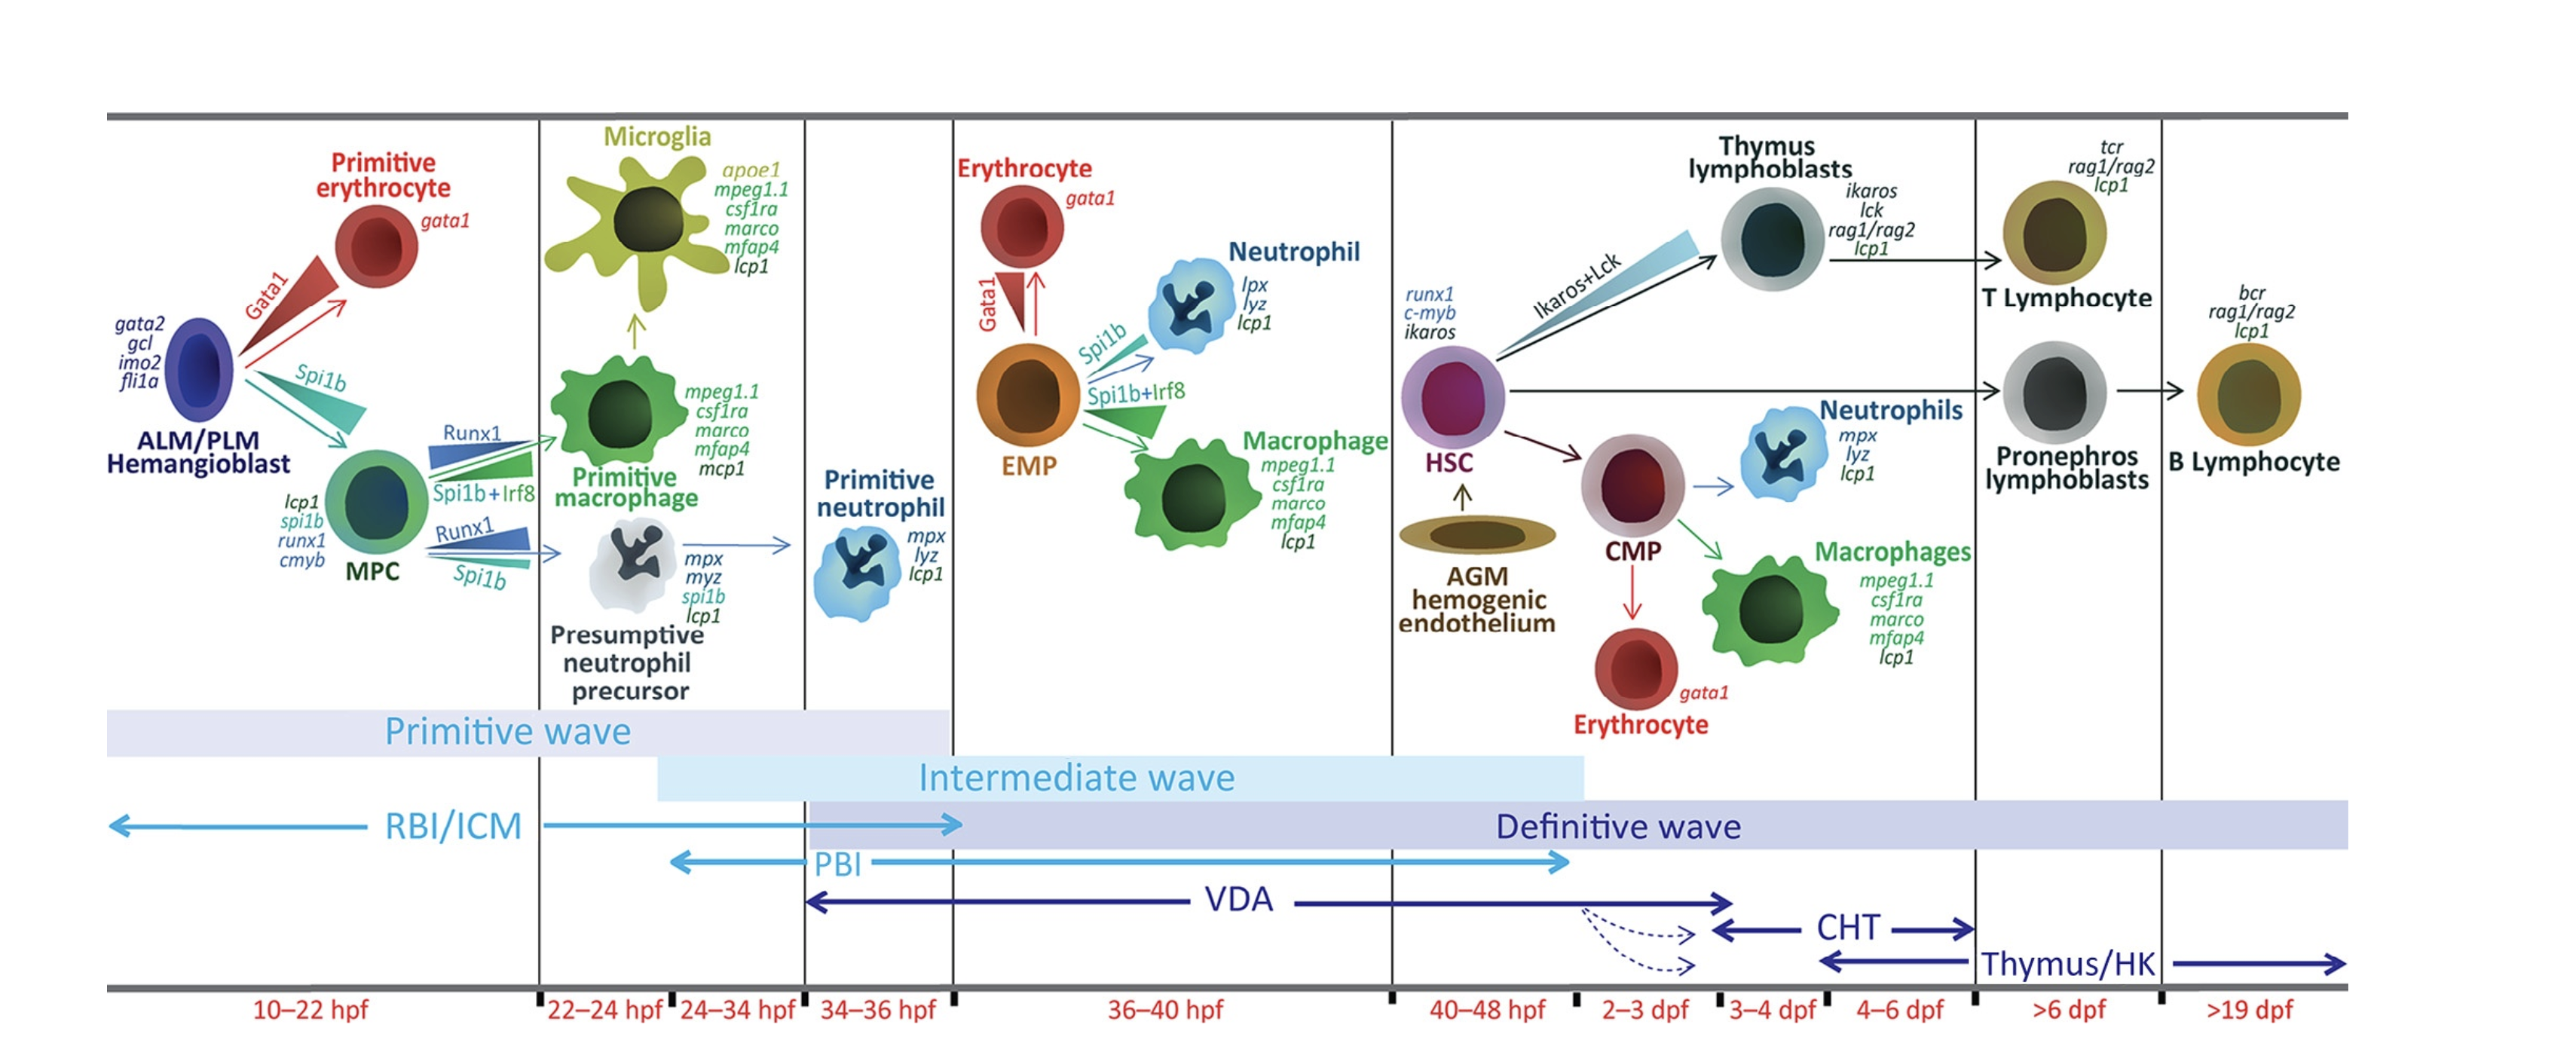

In [62]:
from IPython.display import Image, display

# Displaying a local image
display(Image(filename='figure_from_paper.png'))

['spi1b', 'hbaa1', 'imo2', 'mpo', 'mpeg1.1', 'csf1ro', 'ikaros', 'gata1', 'hbae1', 'fli1', 'irf8', 'tcr', 'runx1', 'csf1ra', 'spi1a', 'lcp1', 'lyz', 'rag2', 'rag1', 'gata2', 'bcr', 'cmyb', 'lck', 'gata1a', 'mpx']
spi1b
1


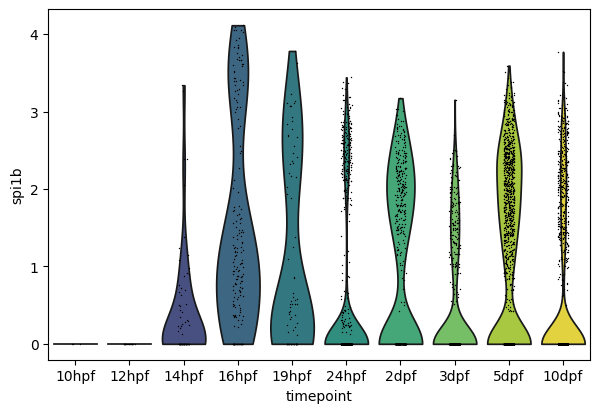

hbaa1
1


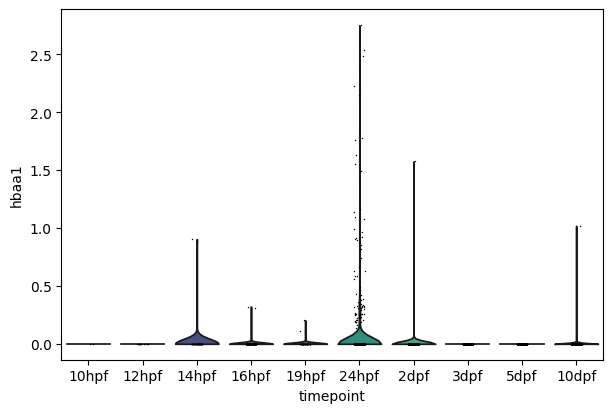

imo2
mpo
mpeg1.1
1


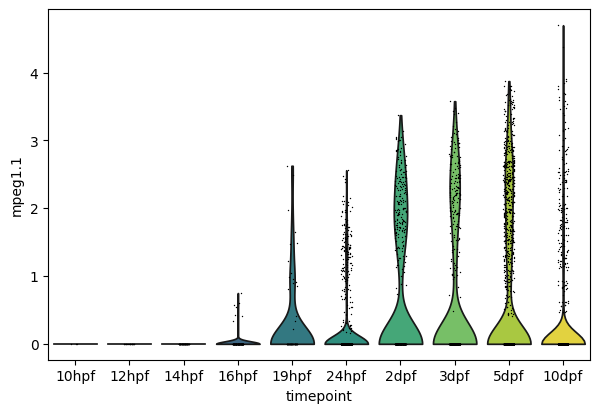

csf1ro
ikaros
gata1
hbae1
fli1
irf8
1


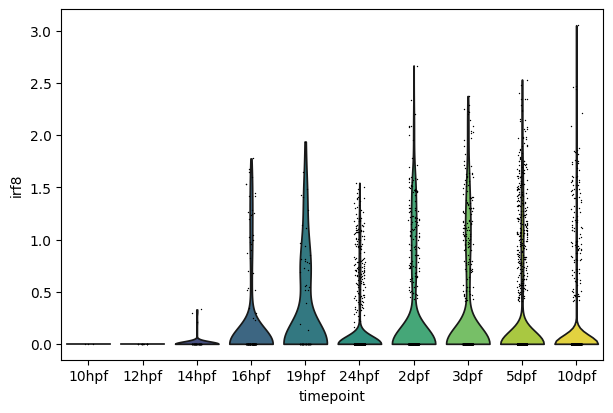

tcr
runx1
1


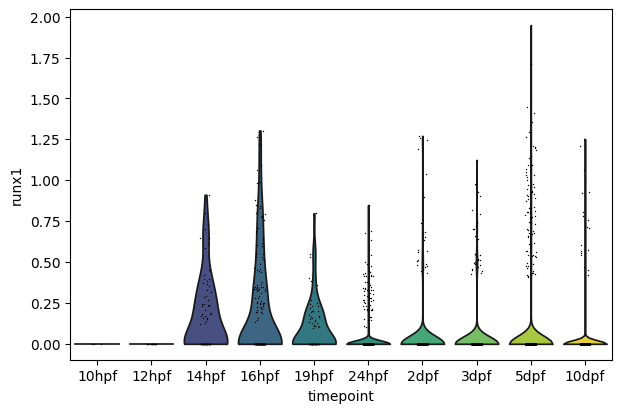

csf1ra
1


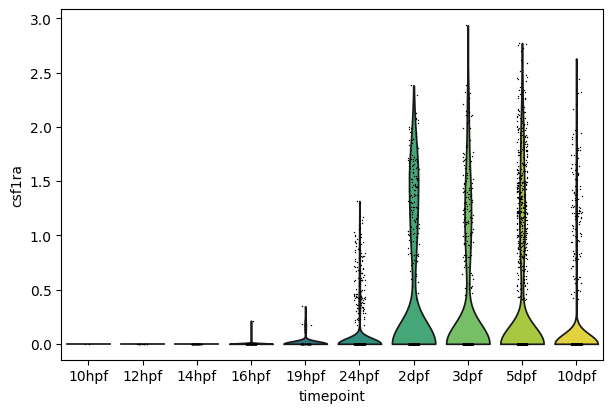

spi1a
1


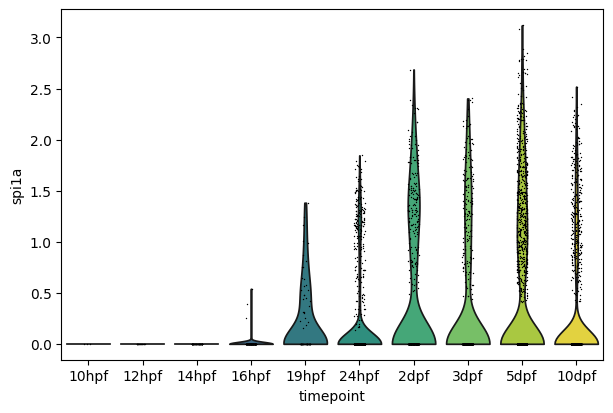

lcp1
1


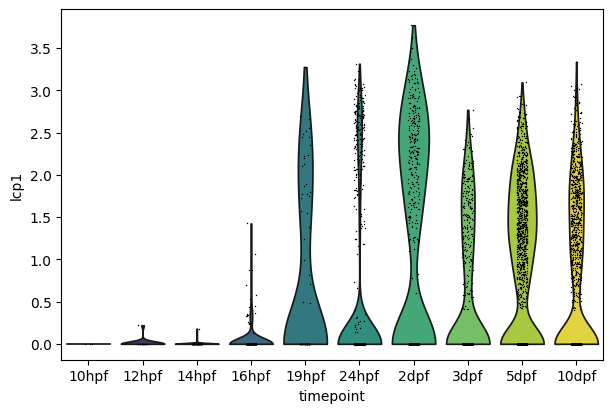

lyz
1


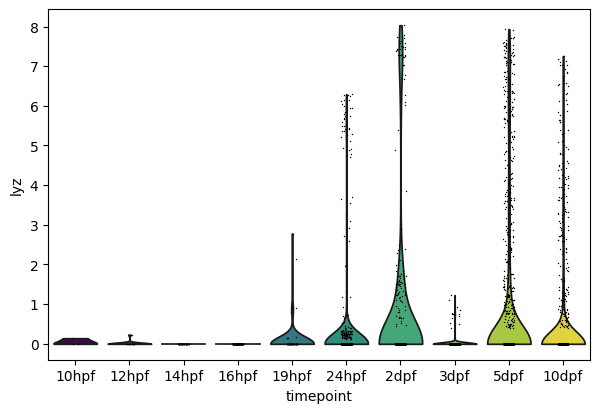

rag2
1


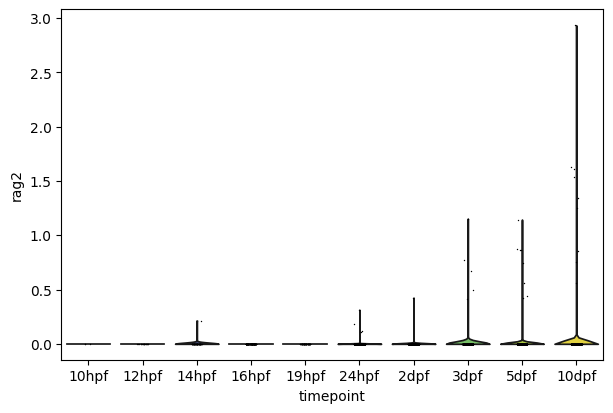

rag1
1


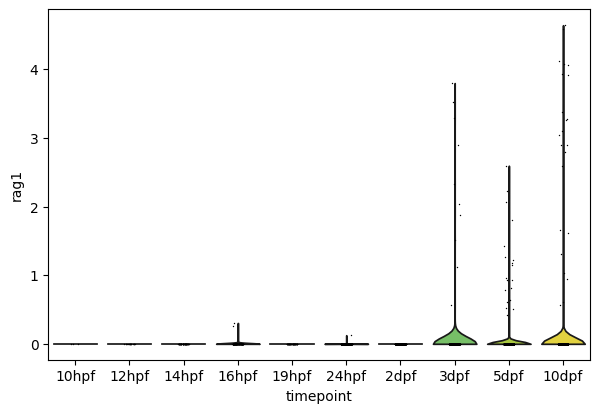

gata2
bcr
1


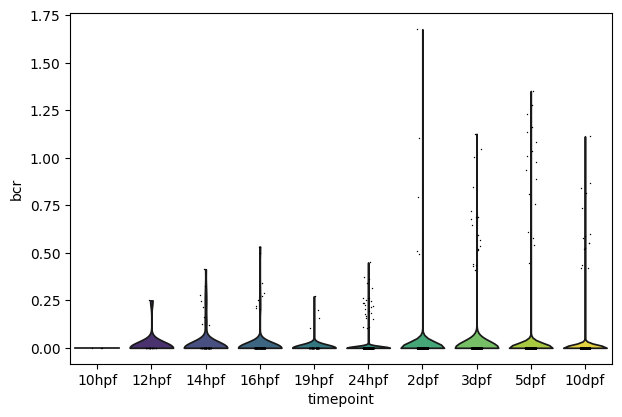

cmyb
lck
1


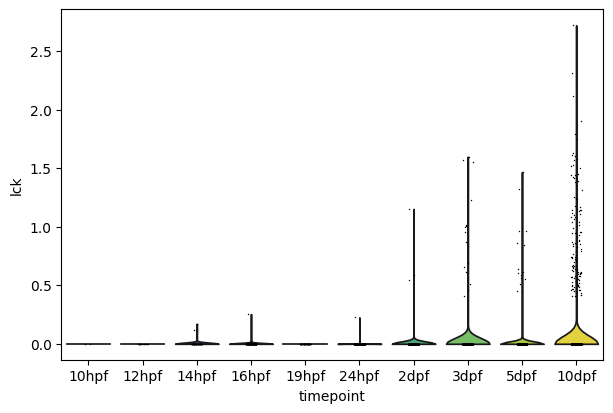

gata1a
1


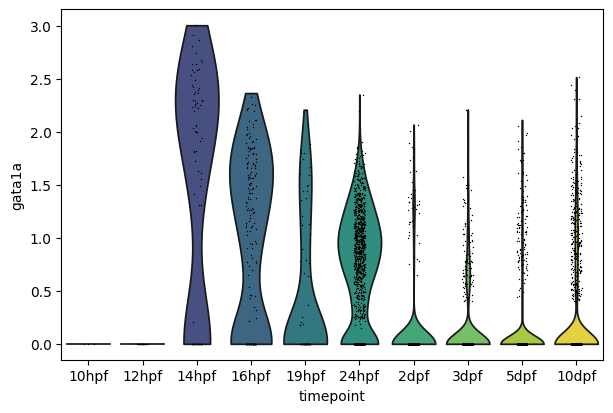

mpx
1


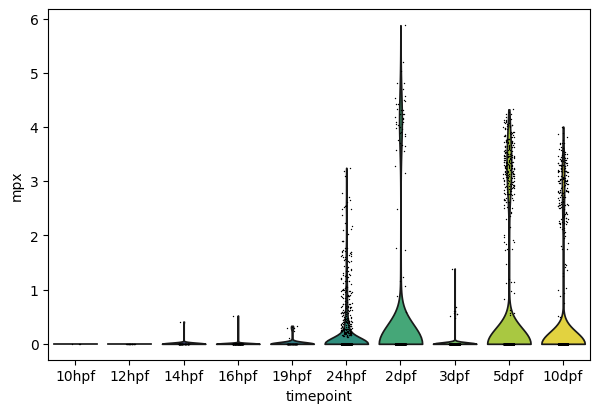

In [37]:
adata = sc.read('zf_atlas_full_v4_release.h5ad')

immune_cells = adata[adata.obs['zebrafish_anatomy_ontology_class'].isin(['hematopoietic_system'])]

# Focus on key genes involved in immune functions
primitive_wave_genes = [
    'gata1a', 'gata2', 'imo2', 'spi1a', 'runx1', 'cmyb', 'hbaa1', 'hbae1'
]

# Intermediate Wave Genes
intermediate_wave_genes = [
    'gata1', 'fli1', 'spi1b', 'irf8', 'mpo', 'mpx', 'lyz', 'csf1ra'
]

# Definitive Wave Genes
definitive_wave_genes = [
    'runx1', 'cmyb', 'ikaros', 'rag1', 'rag2', 'tcr', 'bcr', 'mpeg1.1', 'csf1ro', 'mpx', 'lcp1','lck'
]

# Combined list for overall analysis
key_genes = list(set(primitive_wave_genes + intermediate_wave_genes + definitive_wave_genes))
# key_genes = ['spi1a','gata1a','rag1','runx1t1']
print(key_genes)
selected=[]
# Visualizing expression of key immune genes across developmental stages
for gene in key_genes:
    print(gene)
    try:
        if gene in immune_cells.var_names:
            print('1')
            selected.append(gene)
            sc.pl.violin(immune_cells, keys=gene, groupby='timepoint', save=f'{gene}_expression_per_stage.png')
    except:
        pass

To make it easier to compare, we can group those genes based on three waves. 

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/1968799923.py:41: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



Primitive wave significant genes: ['gata1a', 'spi1a', 'runx1', 'hbaa1', 'lyz']
Intermediate wave significant genes: ['spi1b', 'mpx', 'lyz', 'csf1ra']
Definitive wave significant genes: ['runx1', 'rag1', 'rag2', 'mpeg1.1', 'mpx', 'lcp1', 'lck']


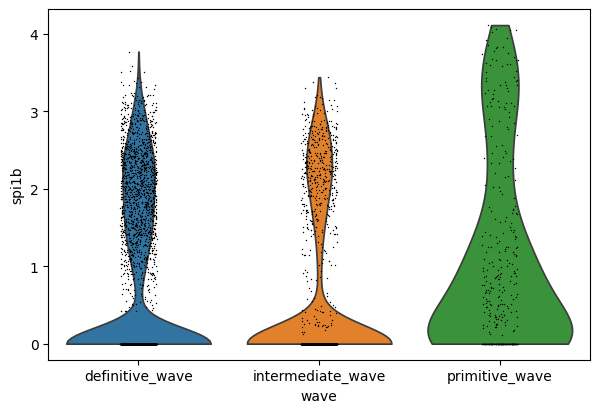

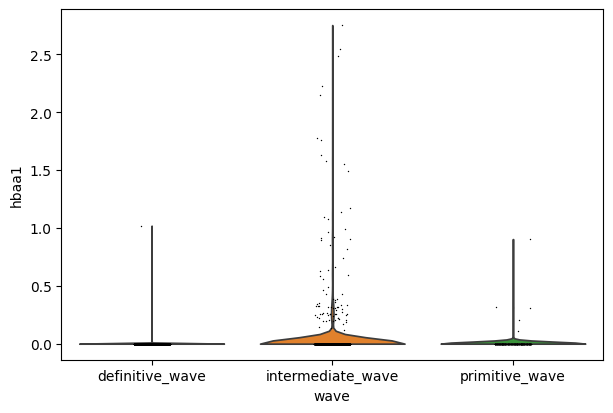

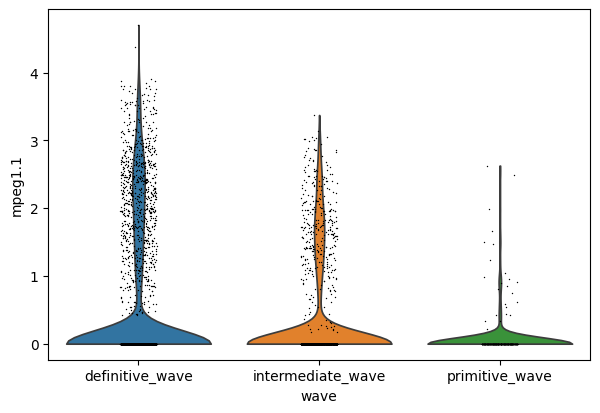

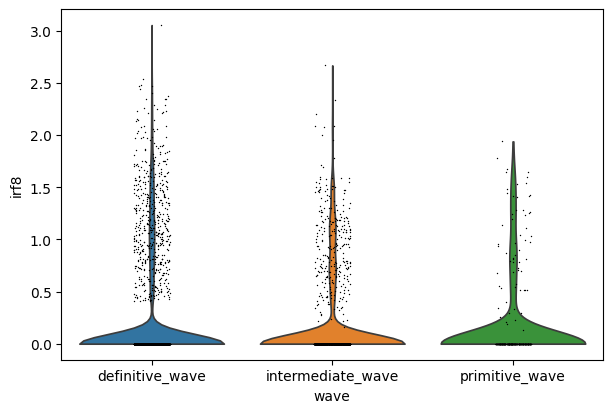

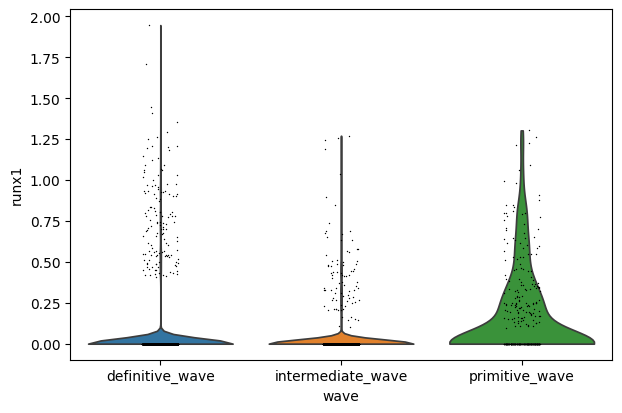

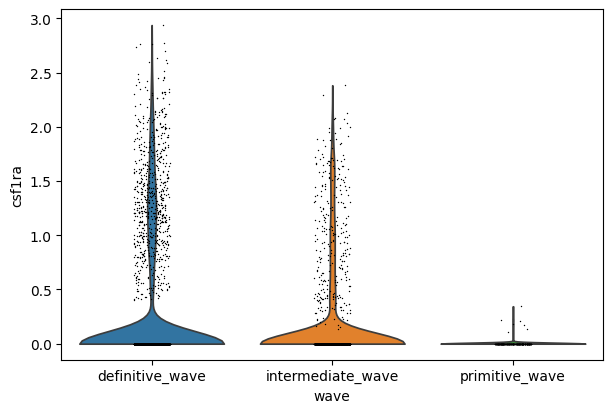

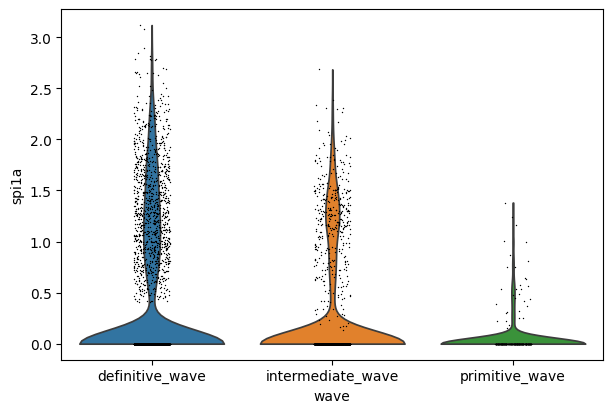

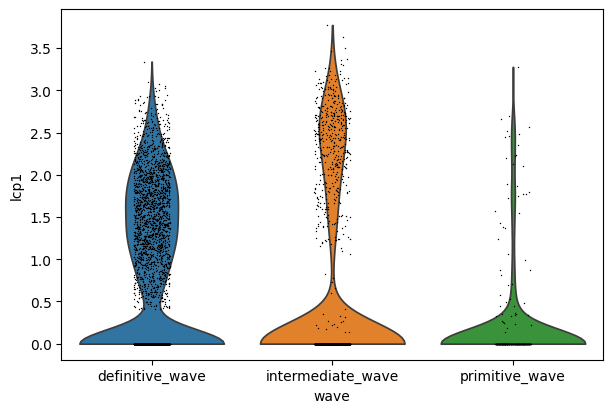

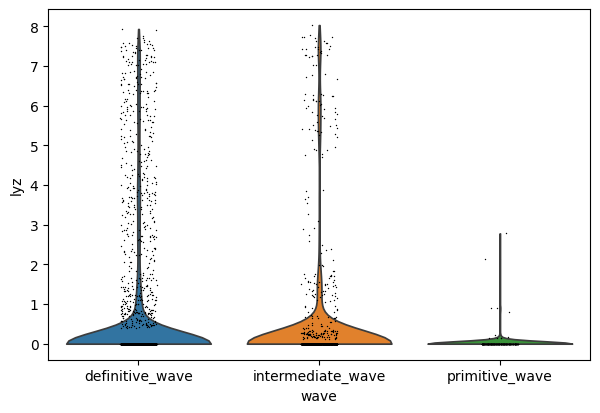

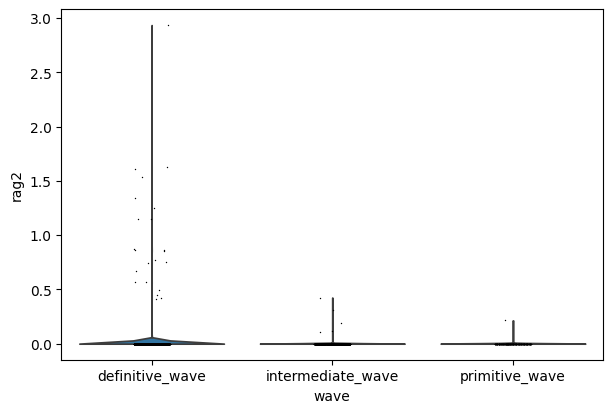

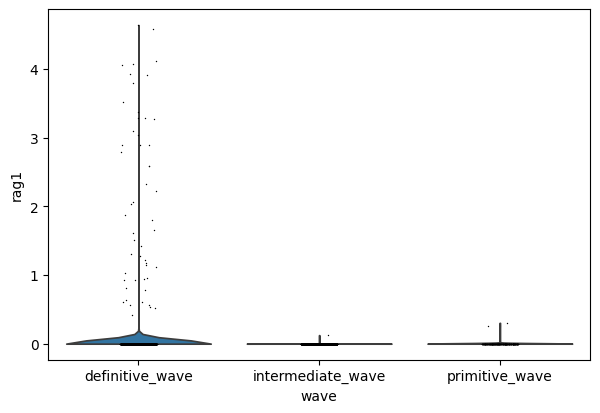

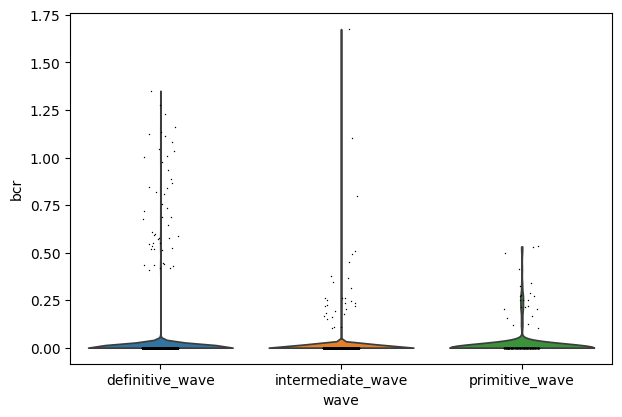

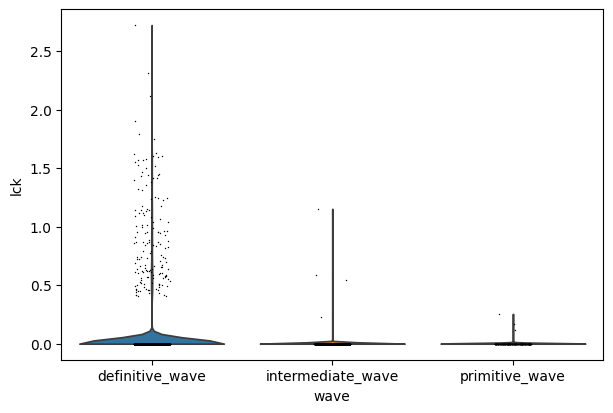

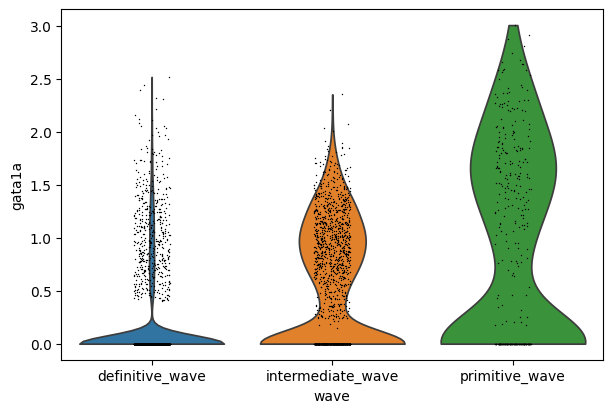

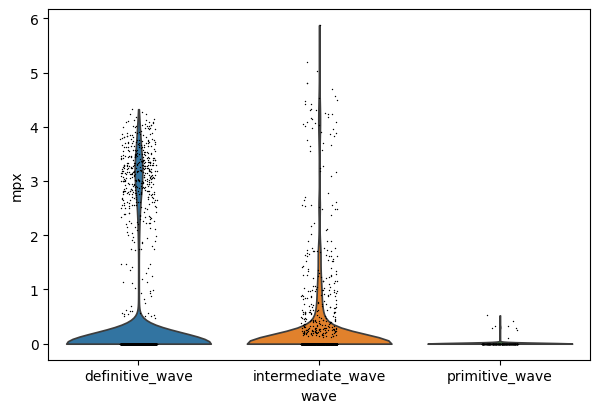

In [60]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Define the immune cells
immune_cells = adata[adata.obs['zebrafish_anatomy_ontology_class'].isin(['hematopoietic_system'])]

# Define the gene groups
primitive_wave_genes = ['gata1a', 'gata2', 'imo2', 'spi1a', 'runx1', 'cmyb', 'hbaa1', 'hbae1','lyz']
intermediate_wave_genes = ['gata1', 'fli1', 'spi1b', 'irf8', 'mpo', 'mpx', 'lyz', 'csf1ra']
definitive_wave_genes = ['runx1', 'cmyb', 'ikaros', 'rag1', 'rag2', 'tcr', 'bcr', 'mpeg1.1', 'csf1ro', 'mpx', 'lcp1', 'lck']

# Combined list of key genes
key_genes = list(set(primitive_wave_genes + intermediate_wave_genes + definitive_wave_genes))

# Filter genes that are in the dataset
selected_genes = [gene for gene in key_genes if gene in immune_cells.var_names]

# Group timepoints into waves
timepoint_to_wave = {
    '10hpf': 'primitive_wave',
    '12hpf': 'primitive_wave',
    '14hpf': 'primitive_wave',
    '16hpf': 'primitive_wave',
    '19hpf': 'primitive_wave',
    '24hpf': 'primitive_wave',
    '24hpf': 'intermediate_wave',
    '2dpf': 'intermediate_wave',
    '3dpf': 'definitive_wave',
    '5dpf': 'definitive_wave',
    '10dpf': 'definitive_wave'
}

# Add wave information to obs
immune_cells.obs['wave'] = immune_cells.obs['timepoint'].map(timepoint_to_wave)

# Convert sparse matrix to dense format for analysis
immune_cells.X = immune_cells.X.toarray()

# Function to perform ANOVA and collect significant genes
def perform_anova_and_collect_significant_genes(adata, gene_group, wave_group_column='wave'):
    significant_genes = []
    for gene in gene_group:
        if gene in adata.var_names:
            # Extract expression data for the gene
            data = [adata[adata.obs[wave_group_column] == wave, gene].X.flatten() for wave in adata.obs[wave_group_column].unique()]
            # Perform ANOVA
            f_val, p_val = f_oneway(*data)
            if p_val < 0.05:  # Significance level
                significant_genes.append(gene)
    return significant_genes

# Initialize dictionary to store results
expression_results = {'primitive_wave': 0, 'intermediate_wave': 0, 'definitive_wave': 0}

# Perform ANOVA for each wave group
primitive_wave_significant = perform_anova_and_collect_significant_genes(immune_cells, primitive_wave_genes)
intermediate_wave_significant = perform_anova_and_collect_significant_genes(immune_cells, intermediate_wave_genes)
definitive_wave_significant = perform_anova_and_collect_significant_genes(immune_cells, definitive_wave_genes)

# Print the results
print("Primitive wave significant genes:", primitive_wave_significant)
print("Intermediate wave significant genes:", intermediate_wave_significant)
print("Definitive wave significant genes:", definitive_wave_significant)

# Visualize expression of key immune genes across developmental waves
for gene in selected_genes:
    sc.pl.violin(immune_cells, keys=gene, groupby='wave', save=f'{gene}_expression_per_wave.png')


As we expected, the trends for these genes align with those described in the paper. For example, genes like rag1, rag2, and lck are mostly activated during the definitive wave. In contrast, a gene like gata1a is more active during the early stages of development.



Let's see the breakdown of some well-known immune system genes in our dataset.

il1b (Interleukin 1 Beta):

Function: A pro-inflammatory cytokine produced by activated macrophages, IL-1β plays a crucial role in the regulation of immune and inflammatory responses to infections or sterile injuries .
tnfa (Tumor Necrosis Factor Alpha):

Function: A cytokine involved in systemic inflammation, TNF-α is part of the acute phase reaction and can induce fever, apoptotic cell death, and inhibit tumorigenesis .
il6 (Interleukin 6):

Function: IL-6 is a multifunctional cytokine that plays essential roles in the immune response, inflammation, and hematopoiesis. It can promote B cell maturation and stimulate the production of acute phase proteins .
ifng (Interferon Gamma):

Function: A critical cytokine for innate and adaptive immunity, IFN-γ is produced by natural killer (NK) and T cells and is important for its antiviral, immunoregulatory, and anti-tumor properties .
mx1 (Myxovirus Resistance 1):

Function: An interferon-induced GTPase that provides resistance to influenza virus and other RNA viruses by inhibiting their replication .
oas1 (2'-5'-Oligoadenylate Synthetase 1):

Function: Part of the interferon-induced antiviral pathway, OAS1 activates RNase L, leading to the degradation of viral RNA and inhibition of viral replication .
isg15 (Interferon-Stimulated Gene 15):

Function: An ubiquitin-like protein that is conjugated to target proteins in response to interferon stimulation, ISG15 plays a role in the antiviral response and modulation of immune signaling pathways .
saa (Serum Amyloid A):

Function: Acute-phase proteins involved in inflammation, SAA proteins are produced in the liver and can influence immune cell recruitment and the clearance of cell debris .
crp (C-Reactive Protein):

Function: A marker of inflammation in the body, CRP levels increase in response to inflammation, infection, and tissue damage, playing a role in the immune response .
tlr3 (Toll-Like Receptor 3):

Function: Recognizes double-stranded RNA, a molecular pattern associated with viral infections, and activates immune responses through the production of type I interferons and other cytokines .
tlr4 (Toll-Like Receptor 4):

Function: Recognizes lipopolysaccharide (LPS) from Gram-negative bacteria, leading to activation of the NF-κB pathway and the production of pro-inflammatory cytokines .
nod1 (Nucleotide-Binding Oligomerization Domain-Containing Protein 1):

Function: A pattern recognition receptor that detects bacterial peptidoglycans and activates immune responses through the NF-κB pathway .
nod2 (Nucleotide-Binding Oligomerization Domain-Containing Protein 2):

Function: Recognizes muramyl dipeptide from bacterial cell walls, initiating immune responses and contributing to the regulation of inflammation and immune homeostasis .

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/3639069550.py:19: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



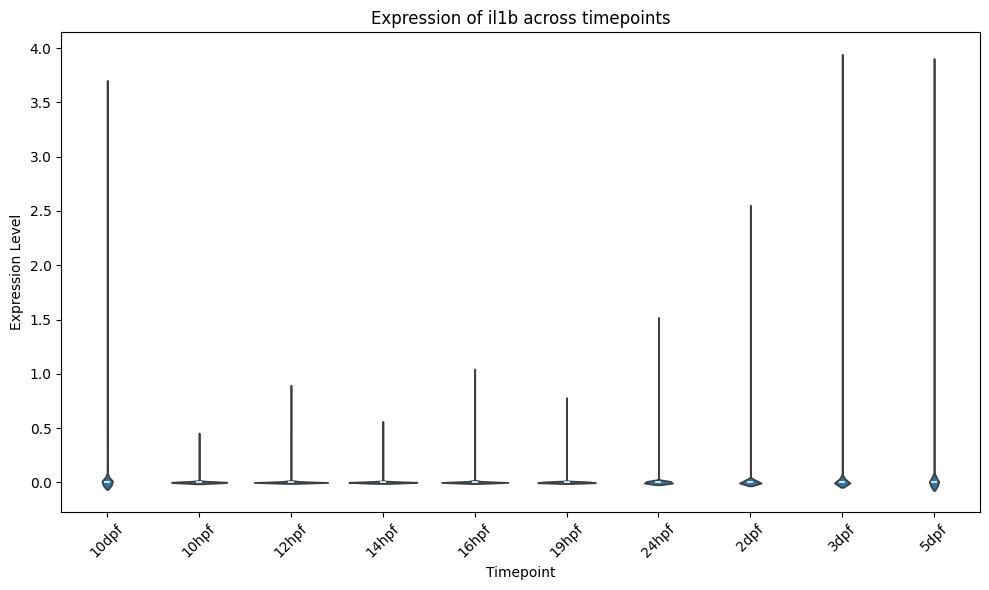

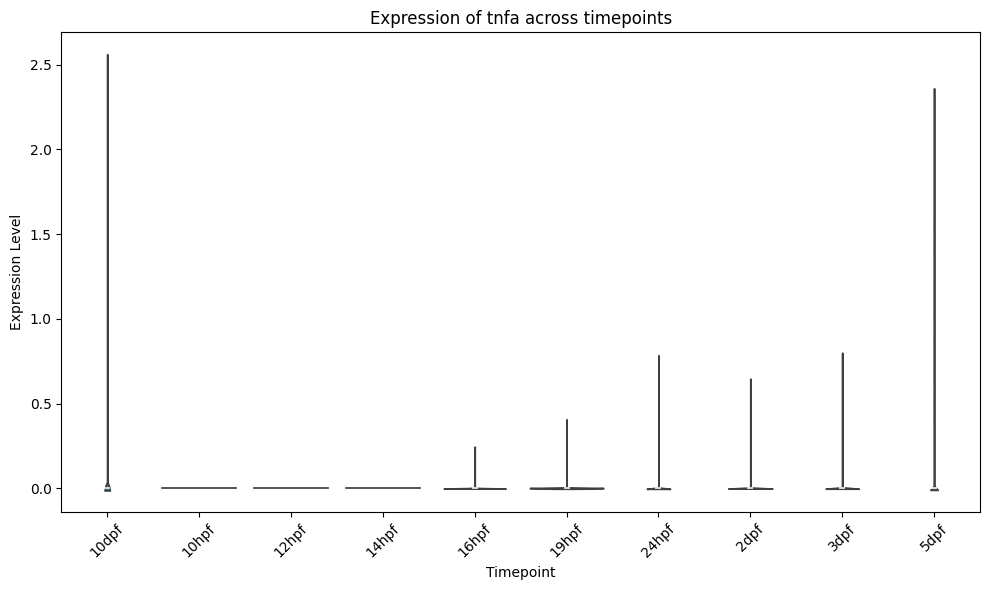

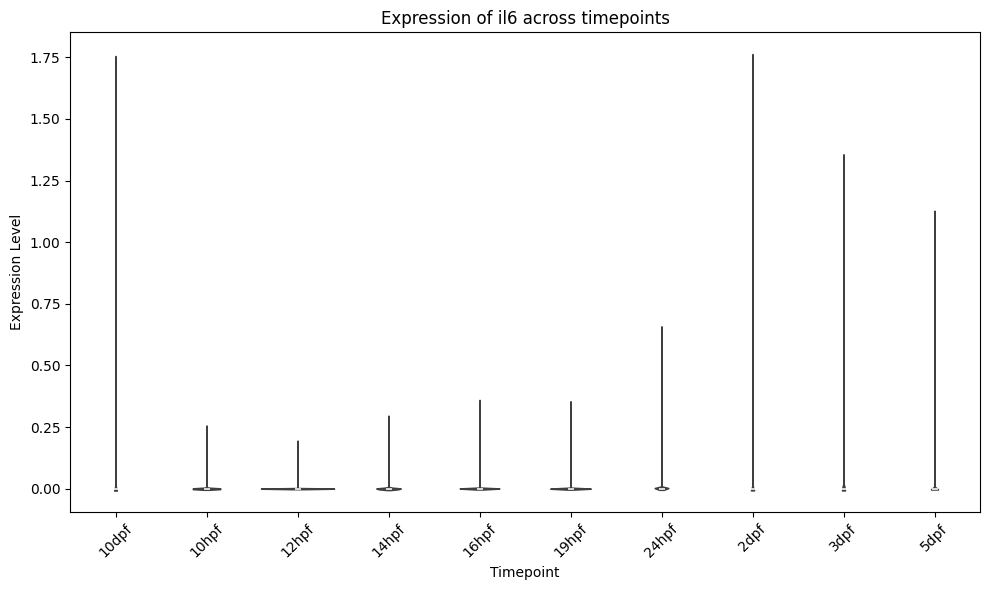

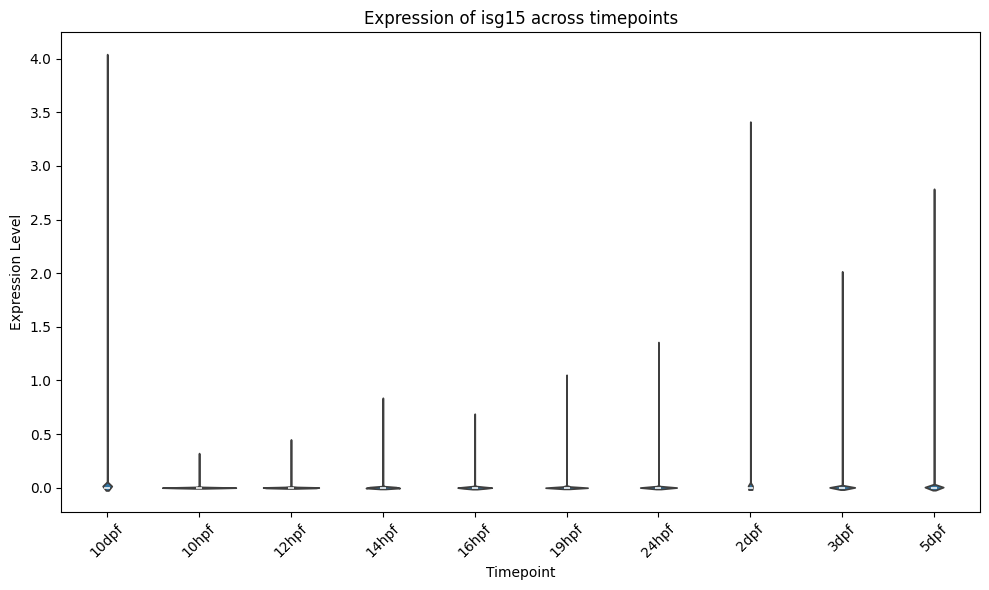

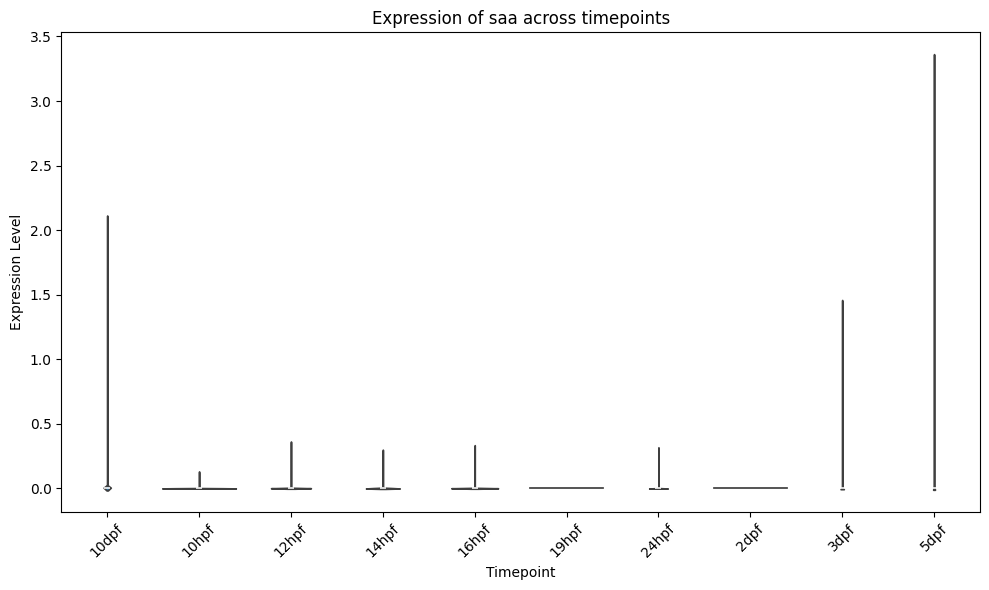

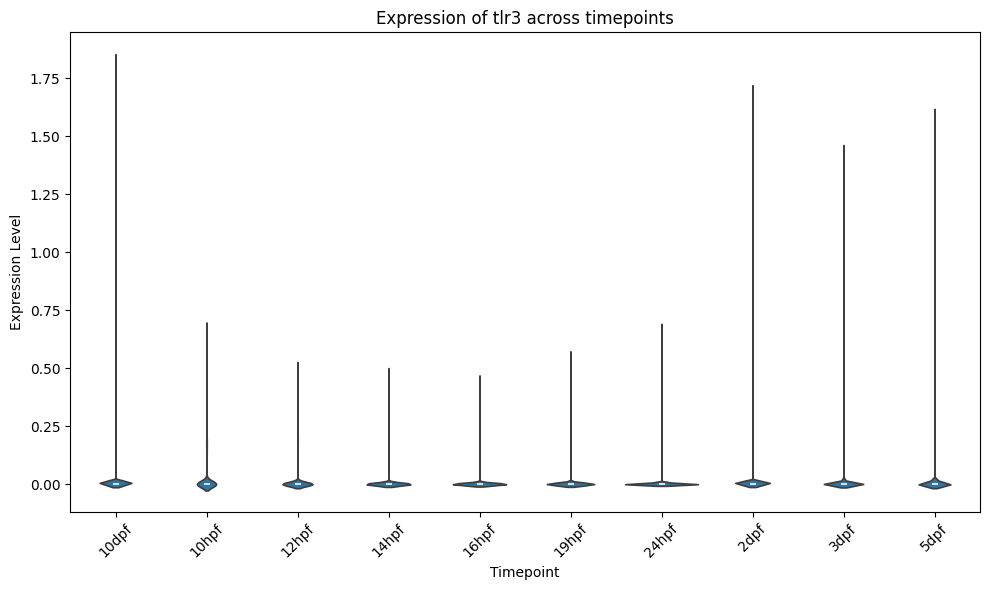

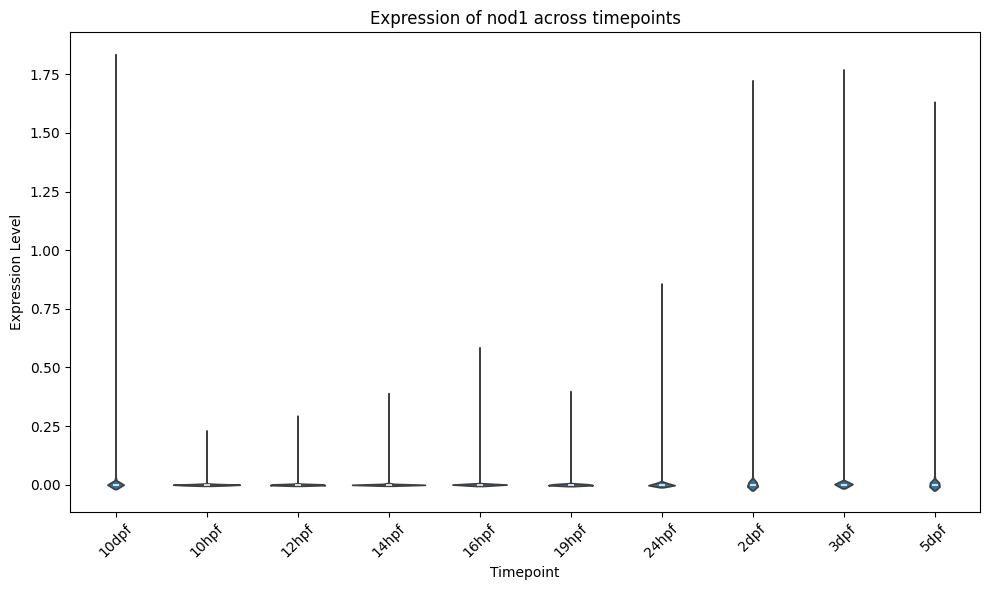

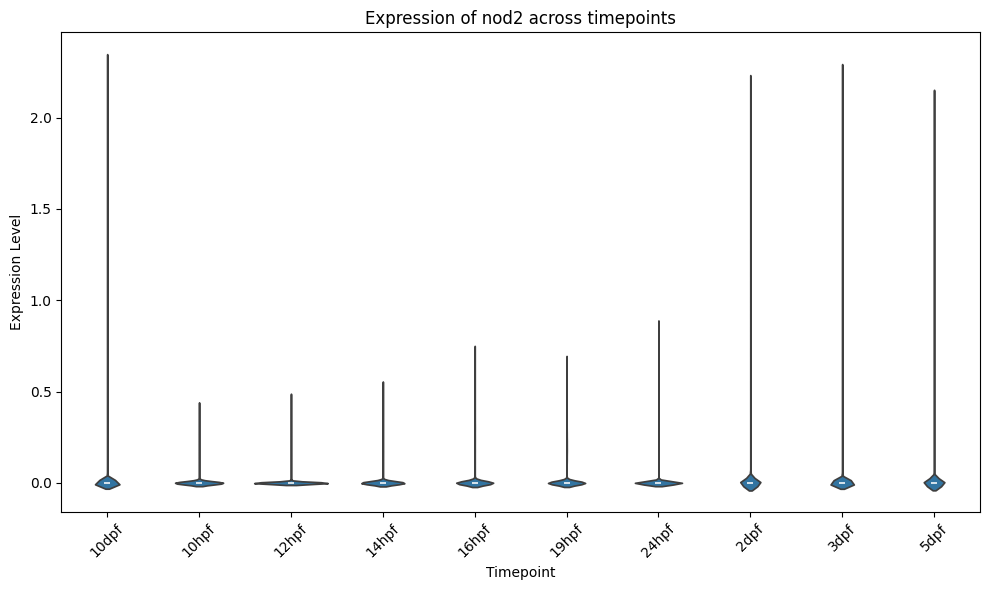

In [38]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define immune-related genes and markers
immune_genes = ['il1b', 'tnfa', 'il6', 'ifng', 'mx1', 'oas1', 'isg15', 'saa', 'crp', 'tlr3', 'tlr4', 'nod1', 'nod2']

# Ensure the genes are present in the dataset
immune_genes_present = [gene for gene in immune_genes if gene in adata.var_names]

# Subset the data for these genes
adata_sub = adata[:, immune_genes_present]

# Add fish ID and timepoint to the subset data for analysis
adata_sub.obs['fish_id'] = adata.obs['fish']
adata_sub.obs['time_point'] = adata.obs['timepoint']

# Convert to a dense DataFrame
data_df = pd.DataFrame(adata_sub.X.toarray(), columns=immune_genes_present, index=adata_sub.obs.index).join(adata_sub.obs)

# Ensure 'timepoint' is treated as a categorical variable
data_df['timepoint'] = pd.Categorical(data_df['timepoint'], categories=sorted(data_df['timepoint'].unique()))

# Create violin plots for key immune genes to compare expression across fish and timepoints
for gene in immune_genes_present:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='timepoint', y=gene, data=data_df)
    plt.xticks(rotation=45)
    plt.title(f'Expression of {gene} across timepoints')
    plt.xlabel('Timepoint')
    plt.ylabel('Expression Level')
    plt.tight_layout()
    plt.savefig(f'violin_{gene}_expression_per_timepoint.png')
    plt.show()


Let's examine how each of the aforementioned genes is expressed in different fish. Each row represents one developmental stage.

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/1283451293.py:4: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.

/Users/farazrabbani/opt/anaconda3/envs/main/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/farazrabbani/opt/anaconda3/envs/main/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/farazrabbani/opt/anacond

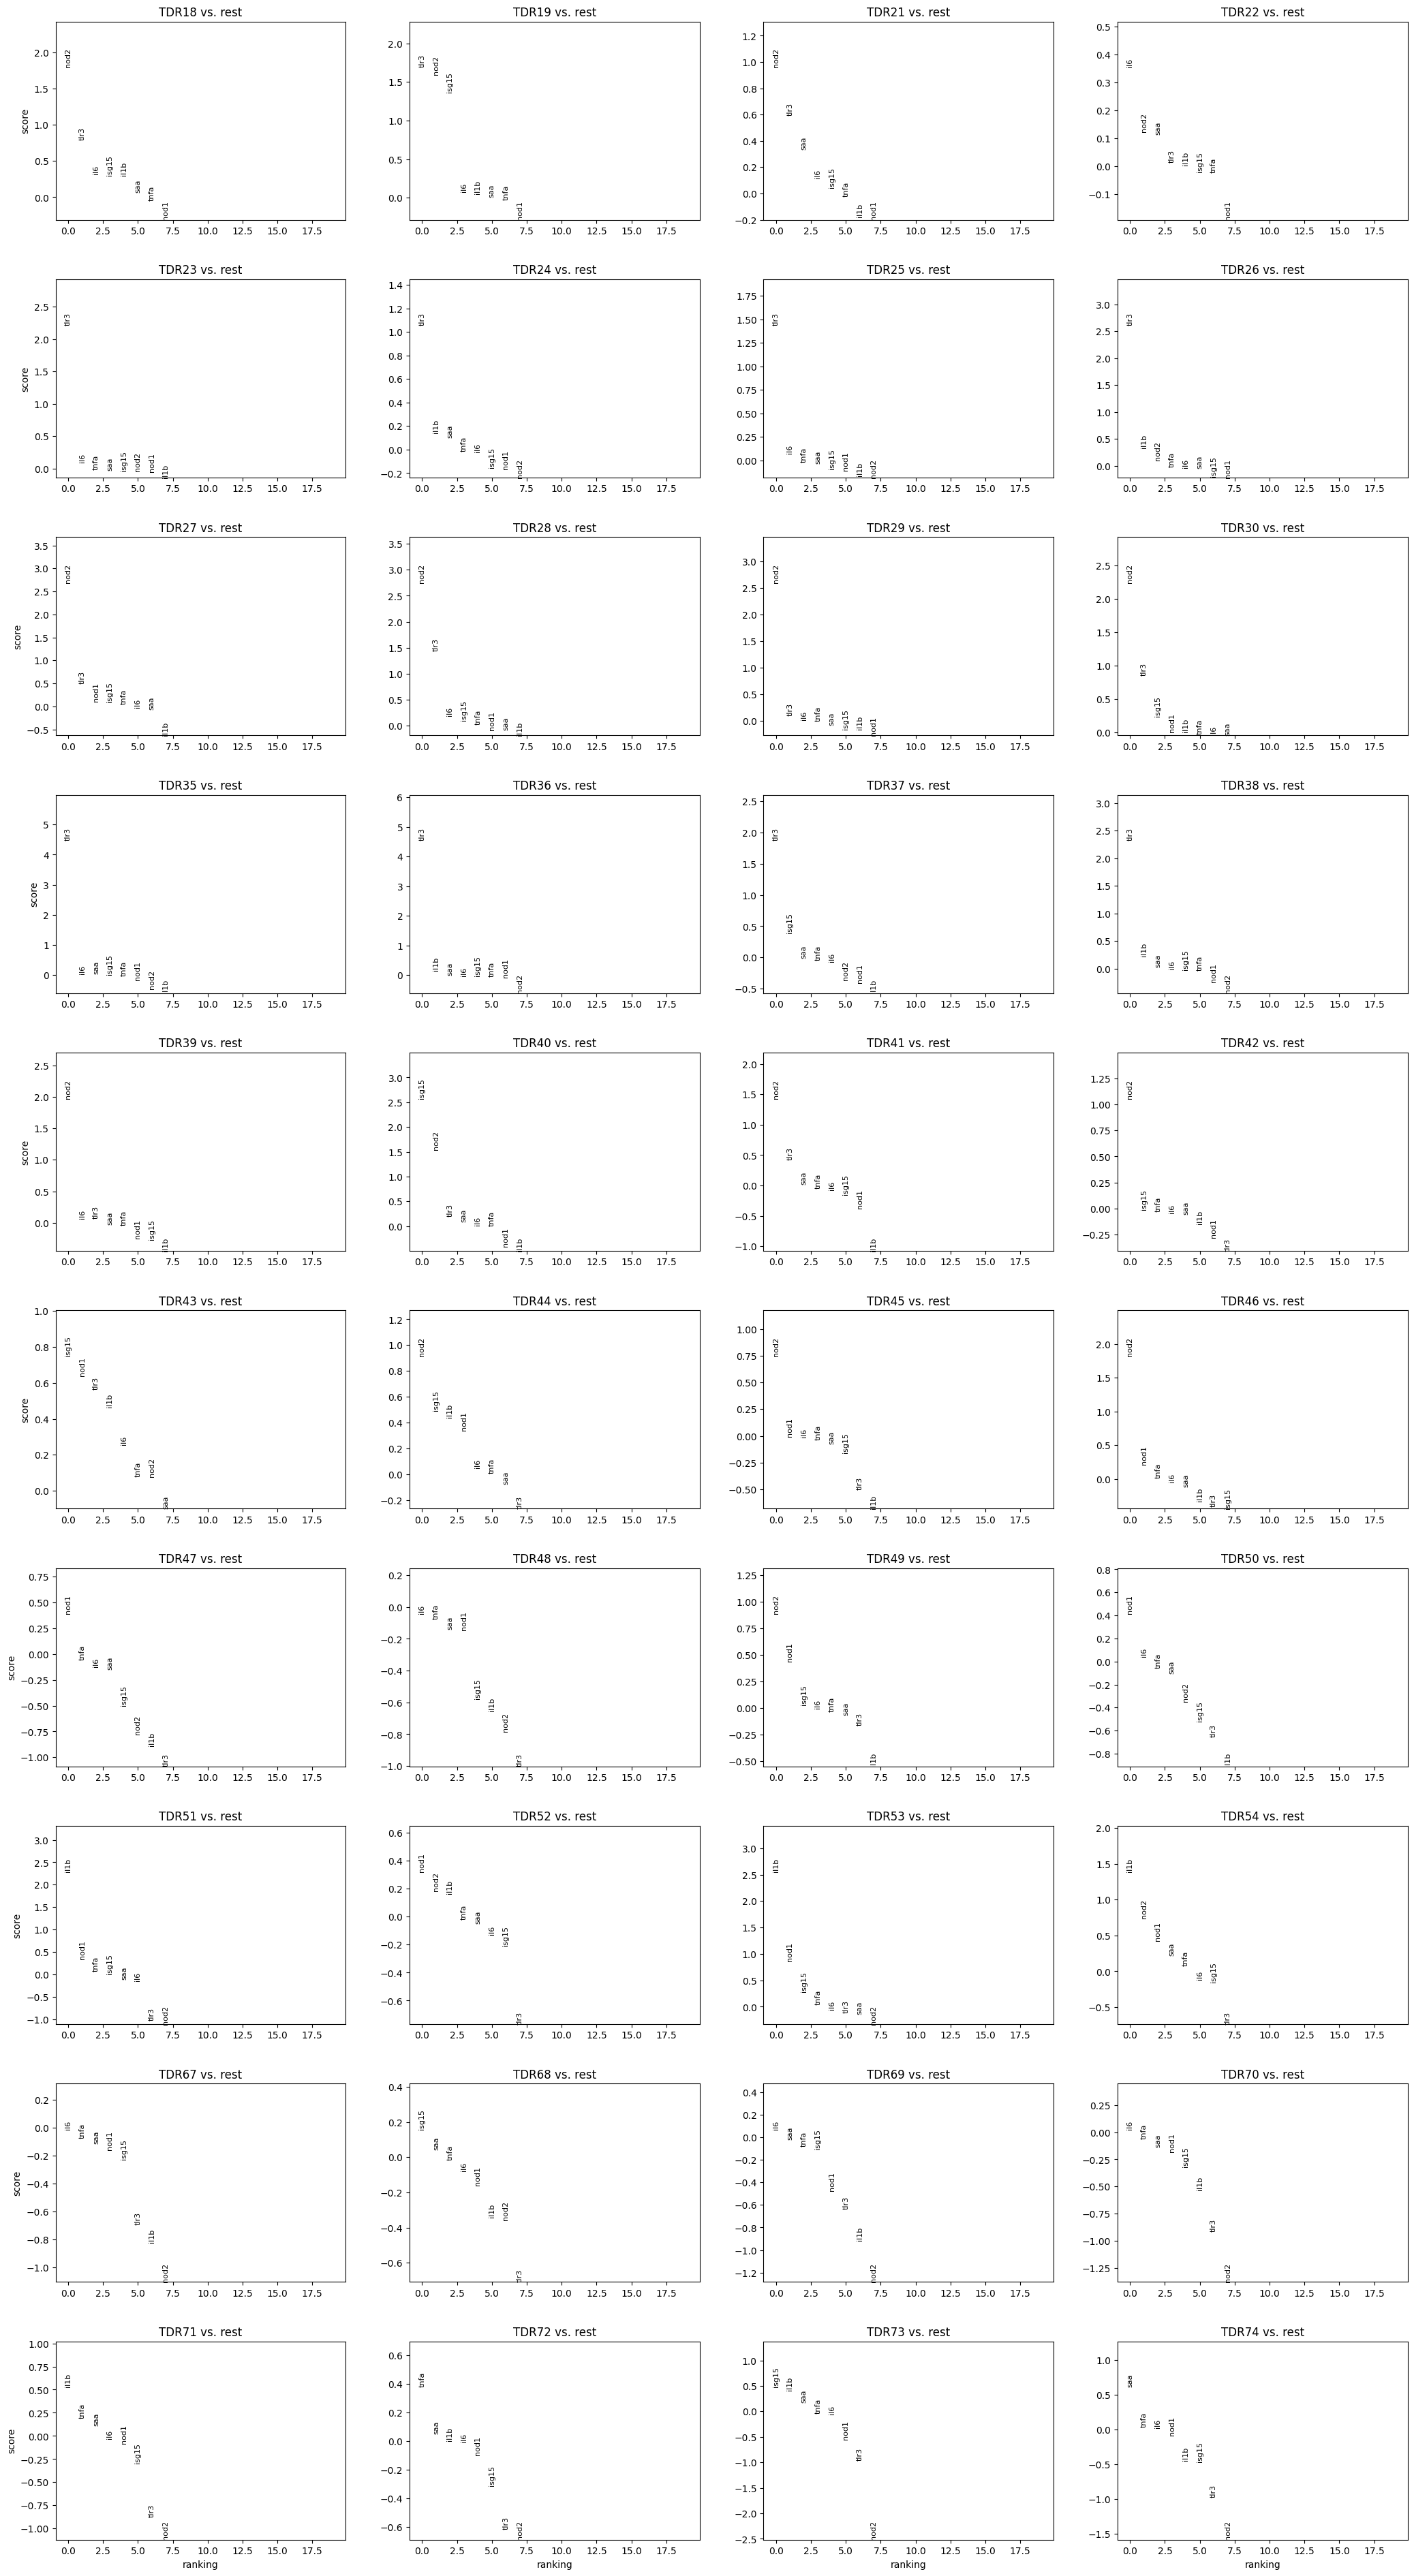

In [10]:
adata_sub = adata[:, immune_genes_present]

# Add fish ID to the subset data for analysis
adata_sub.obs['fish_id'] = adata.obs['fish']

# Perform differential expression analysis between different fish
sc.tl.rank_genes_groups(adata_sub, 'fish_id', method='wilcoxon')

# Visualize the top differentially expressed genes
sc.pl.rank_genes_groups(adata_sub, n_genes=20, sharey=False)


Let's pick the last timepoint, 10 days post-fertilization, to investigate whether there is any immune response to viruses, bacteria, or any signs of inflammation.

#============================================================================================

Commonly Observed Genes:

ISG15:

TDR73: ISG15 is highly expressed, indicating a strong antiviral response.
TDR71 and TDR72: Moderate differential expression.
TDR74: Lower relative expression.

IL1b (Interleukin 1 beta)
Consistently differentially expressed across all fish, indicating inflammation or immune activation.

TNFa (Tumor Necrosis Factor alpha):
Present in all fish, with varying degrees of expression, indicating immune response.

SAA (Serum Amyloid A):
A marker of inflammation, consistently high across all fish.

IL6 (Interleukin 6):
Present in all fish, indicating ongoing immune activity.

NOD1 and NOD2 (Nucleotide-binding Oligomerization Domain-containing proteins):
Involved in recognizing bacterial components, showing variable expression, indicating responses to bacterial infection or stress.

TLR3 (Toll-like Receptor 3):
Recognizes viral double-stranded RNA, indicating potential viral recognition.

#============================================================================================

Fish-Specific Interpretations:

TDR71
High Expression of IL1b, TNFa, SAA, IL6: Indicates strong inflammatory response.
Moderate ISG15: Possible viral infection or stress response.
NOD1: Indicates bacterial recognition.

TDR72
High Expression of IL1b, TNFa, SAA: Strong inflammatory response.
Moderate ISG15 and IL6: Active immune response, potential viral infection.

TDR73
High Expression of ISG15: Strong antiviral response.
IL1b, SAA, TNFa: Significant inflammatory response.
NOD1: Bacterial response.

TDR74
High Expression of SAA: Strong inflammation.
Lower Expression of ISG15: Lesser antiviral response compared to others.
IL6, IL1b, TNFa: Active immune response.
#============================================================================================

Overall Interpretation:

- Consistent Inflammation: All fish show high levels of IL1b, TNFa, SAA, and IL6, indicating ongoing inflammation.
Viral Infection: High ISG15 in TDR73 suggests a strong antiviral response, possibly indicating a viral infection.
Bacterial Response: NOD1 and TLR3 expression in some fish suggest responses to bacterial components or stress.
Conclusion

- High ISG15: Indicates antiviral responses, suggesting some fish might be fighting viral infections.
Inflammatory Markers: Consistent high levels of IL1b, TNFa, and SAA indicate that all fish are experiencing some level of immune activation or stress.

- Diversity in Immune Response: Differences in the levels of these genes across fish indicate variability in immune response, potentially due to different stages of infection or different pathogens.

Let's specifically examine the gene isg15 to see if there was any immune response in any of the fish at the developmental stage of 10 days post-fertilization (10dpf).

First, we need to determine if the high expression value of isg15 is related to an immune response or if it is simply a general trend associated with the developmental stage.

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/2539530577.py:19: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



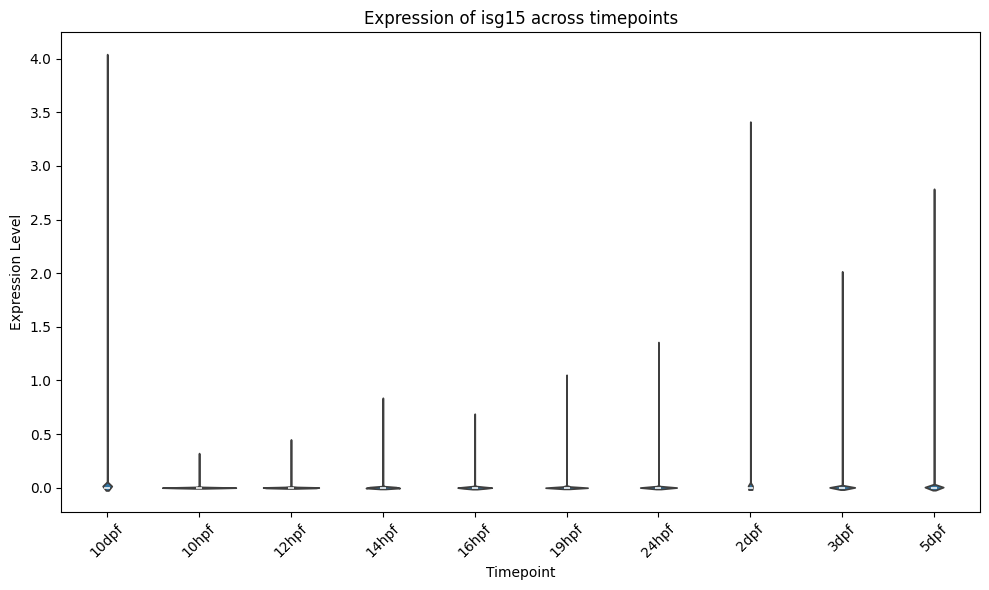

In [39]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your AnnData object (assuming it's already loaded as 'adata')
# adata = sc.read('path_to_your_anndata_file.h5ad')

# Define immune-related genes and markers
immune_genes = [ 'isg15']

# Ensure the genes are present in the dataset
immune_genes_present = [gene for gene in immune_genes if gene in adata.var_names]

# Subset the data for these genes
adata_sub = adata[:, immune_genes_present]

# Add fish ID and timepoint to the subset data for analysis
adata_sub.obs['fish_id'] = adata.obs['fish']
adata_sub.obs['time_point'] = adata.obs['timepoint']

# Convert to a dense DataFrame
data_df = pd.DataFrame(adata_sub.X.toarray(), columns=immune_genes_present, index=adata_sub.obs.index).join(adata_sub.obs)

# Ensure 'timepoint' is treated as a categorical variable
data_df['timepoint'] = pd.Categorical(data_df['timepoint'], categories=sorted(data_df['timepoint'].unique()))

# Create violin plots for key immune genes to compare expression across fish and timepoints
for gene in immune_genes_present:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='timepoint', y=gene, data=data_df)
    plt.xticks(rotation=45)
    plt.title(f'Expression of {gene} across timepoints')
    plt.xlabel('Timepoint')
    plt.ylabel('Expression Level')
    plt.tight_layout()
    plt.savefig(f'violin_{gene}_expression_per_timepoint.png')
    plt.show()


It appears that higher expression of isg15 is a general trend during this developmental stage. Let's confirm if this observation is statistically significant.

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/15938784.py:21: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



Mean ISG15 expression at 10dpf: 0.006107148248702288
Fish with higher than average ISG15 expression at 10dpf:


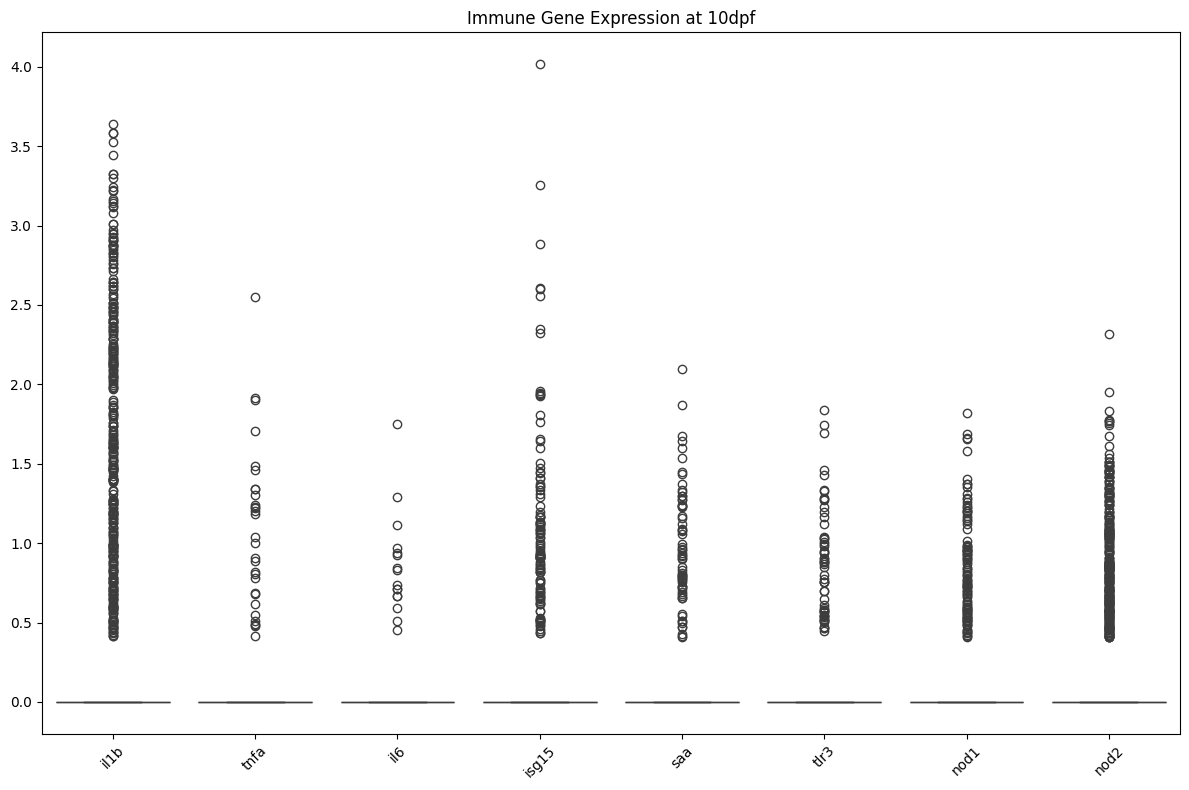

T-test results comparing ISG15 expression at 10dpf with other timepoints:
10dpf vs 10hpf: p-value = 5.177183783973521e-13
10dpf vs 12hpf: p-value = 6.823301694239983e-10
10dpf vs 14hpf: p-value = 0.0005023471787928139
10dpf vs 16hpf: p-value = 0.0429391292452986
10dpf vs 19hpf: p-value = 6.772680296530152e-07
10dpf vs 24hpf: p-value = 0.0003420782370632937
10dpf vs 2dpf: p-value = 3.924616571953308e-05
10dpf vs 3dpf: p-value = 0.05855118541625225
10dpf vs 5dpf: p-value = 0.6944024365188699


In [40]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Define immune-related genes and markers
immune_genes = ['il1b', 'tnfa', 'il6', 'ifng', 'mx1', 'oas1', 'isg15', 'saa', 'crp', 'tlr3', 'tlr4', 'nod1', 'nod2']

# Ensure the genes are present in the dataset
immune_genes_present = [gene for gene in immune_genes if gene in adata.var_names]

# Subset the data for these genes
adata_sub = adata[:, immune_genes_present]

# Add fish ID and timepoint to the subset data for analysis
adata_sub.obs['fish_id'] = adata.obs['fish']
adata_sub.obs['timepoint'] = adata.obs['timepoint']

# Convert to a dense DataFrame
data_df = pd.DataFrame(adata_sub.X.toarray(), columns=immune_genes_present, index=adata_sub.obs.index).join(adata_sub.obs)

# Ensure 'timepoint' is treated as a categorical variable
data_df['timepoint'] = pd.Categorical(data_df['timepoint'], categories=sorted(data_df['timepoint'].unique()))

# 1. Compare Individual Fish at 10dpf
data_10dpf = data_df[data_df['timepoint'] == '10dpf']
mean_isg15_10dpf = data_10dpf['isg15'].mean()
high_isg15_fish_10dpf = data_10dpf[data_10dpf['isg15'] > mean_isg15_10dpf]

print(f"Mean ISG15 expression at 10dpf: {mean_isg15_10dpf}")
print("Fish with higher than average ISG15 expression at 10dpf:")
# print(high_isg15_fish_10dpf)

# 2. Examine Other Immune Genes at 10dpf
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_10dpf[immune_genes_present])
plt.title('Immune Gene Expression at 10dpf')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Statistical Testing for ISG15 Across Timepoints
expression_isg15 = []
timepoints = sorted(data_df['timepoint'].unique())

for timepoint in timepoints:
    expression_isg15.append(data_df[data_df['timepoint'] == timepoint]['isg15'].values)

# Perform t-test between 10dpf and each other timepoint
ttest_results = {}
for i, timepoint in enumerate(timepoints):
    if timepoint != '10dpf':
        t_stat, p_val = ttest_ind(expression_isg15[timepoints.index('10dpf')], expression_isg15[i], equal_var=False)
        ttest_results[timepoint] = p_val

print("T-test results comparing ISG15 expression at 10dpf with other timepoints:")
for timepoint, p_val in ttest_results.items():
    print(f"10dpf vs {timepoint}: p-value = {p_val}")




Significant Differences:

10dpf vs 10hpf, 12hpf, 14hpf, 19hpf, 24hpf, and 2dpf: The very low p-values indicate significant differences in ISG15 expression between 10dpf and these timepoints.
10dpf vs 16hpf: The p-value is just below 0.05, indicating a marginally significant difference.
10dpf vs 3dpf: The p-value is slightly above 0.05, suggesting a non-significant difference but still close to the threshold.
10dpf vs 5dpf: The high p-value indicates no significant difference in ISG15 expression between these timepoints.


The boxplot shows the expression levels of several immune-related genes at 10dpf. Here's how to interpret it:

IL1b, TNFa, IL6, SAA, TLR3, NOD1, NOD2: These genes show varying levels of expression across fish, with many data points indicating variability in immune responses among individual fish.

ISG15: High variability and higher expression levels suggest an active immune response in some fish, potentially due to viral infection or other immune challenges.

Conclusion:

- Significant Differences: The significant p-values between 10dpf and most other timepoints confirm that the high ISG15 levels observed at 10dpf are not simply due to overall higher expression but indicate a specific response.
- Immune Response: The higher and more variable ISG15 expression, along with the expression of other immune genes, suggests that some fish (especially TDR73) at 10dpf may be experiencing an immune challenge, likely due to viral infection or stress.

As the last step, let's examine the chart with color coded fish id for isg15. 

/var/folders/pt/k8jxy97j7pv3tggqfnl1sysm0000gn/T/ipykernel_81440/3448215167.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




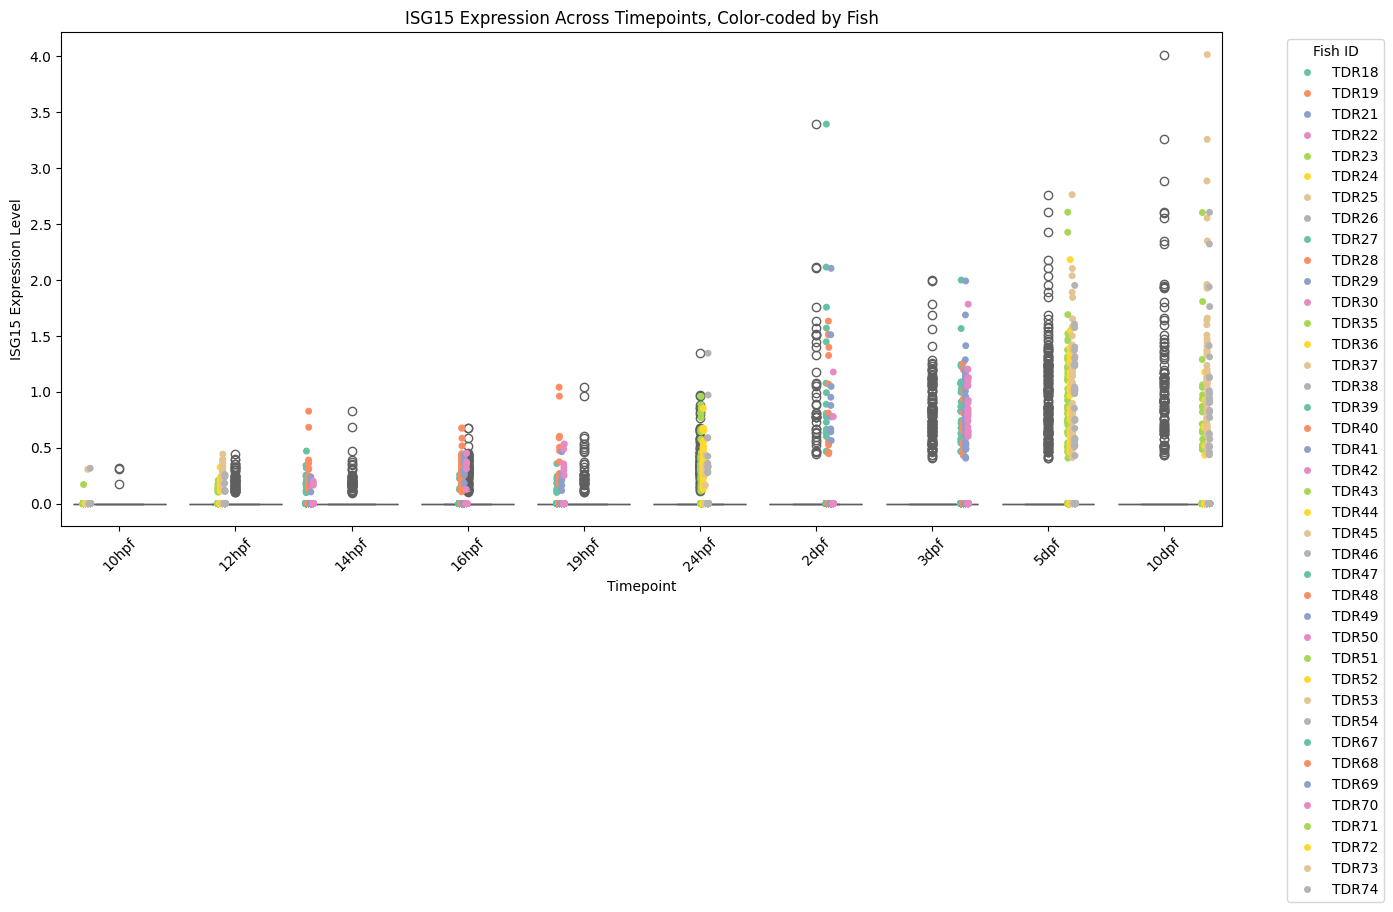

In [45]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define ISG15 and timepoints
gene = 'isg15'
timepoints = ['10hpf', '12hpf', '14hpf', '16hpf', '19hpf', '24hpf', '2dpf', '3dpf', '5dpf', '10dpf']

# Extract ISG15 expression data and timepoints
isg15_data = adata[:, gene].X.toarray().flatten()
timepoint_data = adata.obs['timepoint']
fish_data = adata.obs['fish']  # assuming 'fish_id' is the column name

# Create a DataFrame for visualization
df = pd.DataFrame({'ISG15': isg15_data, 'Timepoint': timepoint_data, 'Fish': fish_data})

# Plot ISG15 expression across timepoints with fish color-coded
plt.figure(figsize=(14, 8))
sns.boxplot(x='Timepoint', y='ISG15', data=df, order=timepoints, palette="Set3")
sns.stripplot(x='Timepoint', y='ISG15', data=df, hue='Fish', dodge=True, palette='Set2', jitter=True, size=5)
plt.xticks(rotation=45)
plt.title('ISG15 Expression Across Timepoints, Color-coded by Fish')
plt.xlabel('Timepoint')
plt.ylabel('ISG15 Expression Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Fish ID')
plt.tight_layout()
plt.show()


As we expected, TDR73 shows a significantly higher expression level of isg15 compared to other fish, even within their developmental stage.

